In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'cv2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

dataset_path = '/content/drive/MyDrive/Cloud Computing Dataset/brain_tumor_dataset'

folders = os.listdir(dataset_path)
print(folders)


['yes', 'no']


In [ ]:
subdirs = os.listdir(dataset_path)[:2]
for subdir in subdirs:
    print(f"{subdir} contains {len(os.listdir(dataset_path+'/'+subdir))} images")

yes contains 155 images
no contains 98 images


In [ ]:

def load_images(folder):
    
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128,128))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1
    
    imgs = np.array(imgs)
    labels = np.array(labels)
    
    return imgs, labels

In [ ]:
data, labels = load_images(dataset_path)
data.shape, labels.shape

((253, 128, 128), (253,))

In [ ]:
def plot_images(start, end):
    plt.figure(figsize=(22,8))
    for i in range(10):
        axs = plt.subplot(2,5, i+1)
        idx = np.random.randint(start, end)
        plt.imshow(data[idx], cmap='gray')
        plt.axis('on')
        axs.set_xticklabels([])
        axs.set_yticklabels([])
        plt.subplots_adjust(wspace=None, hspace=None)

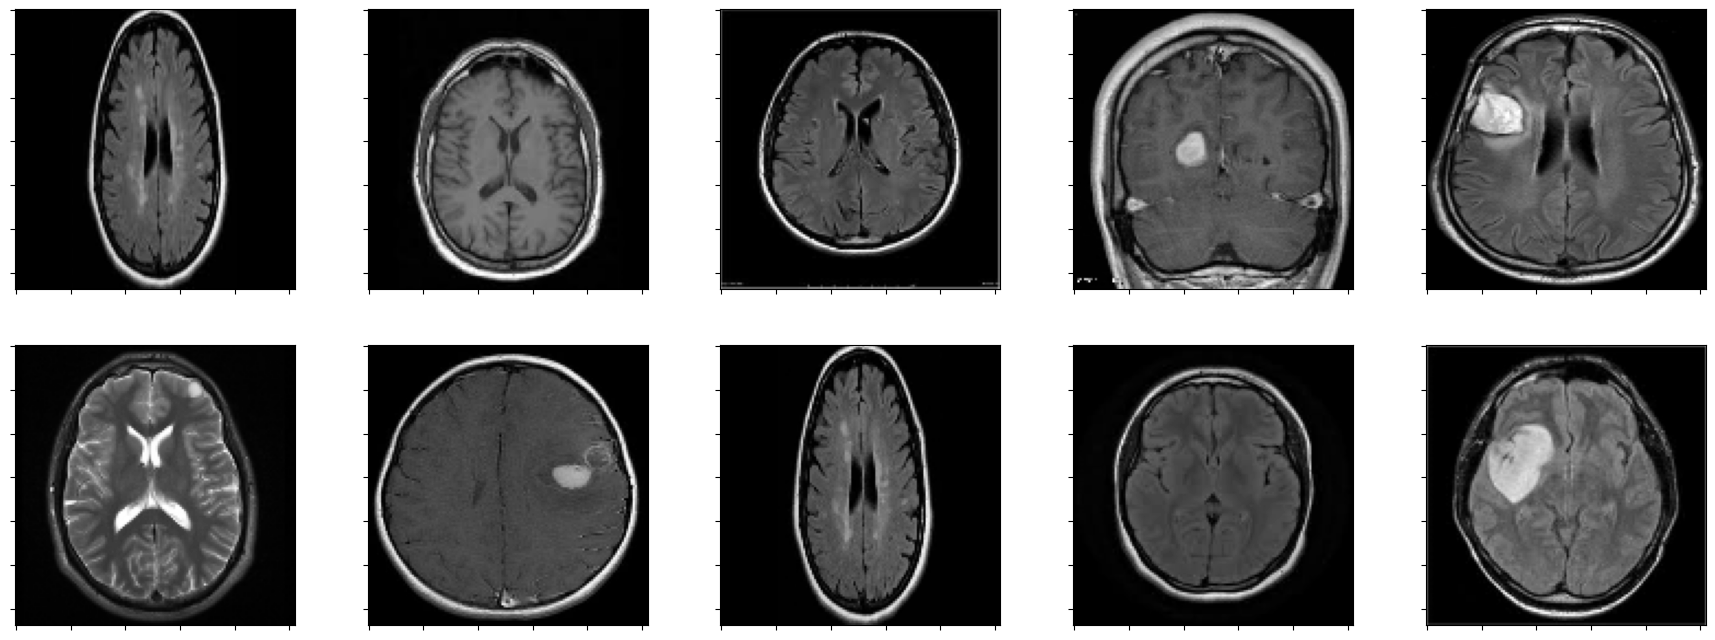

In [ ]:
plot_images(98,252)

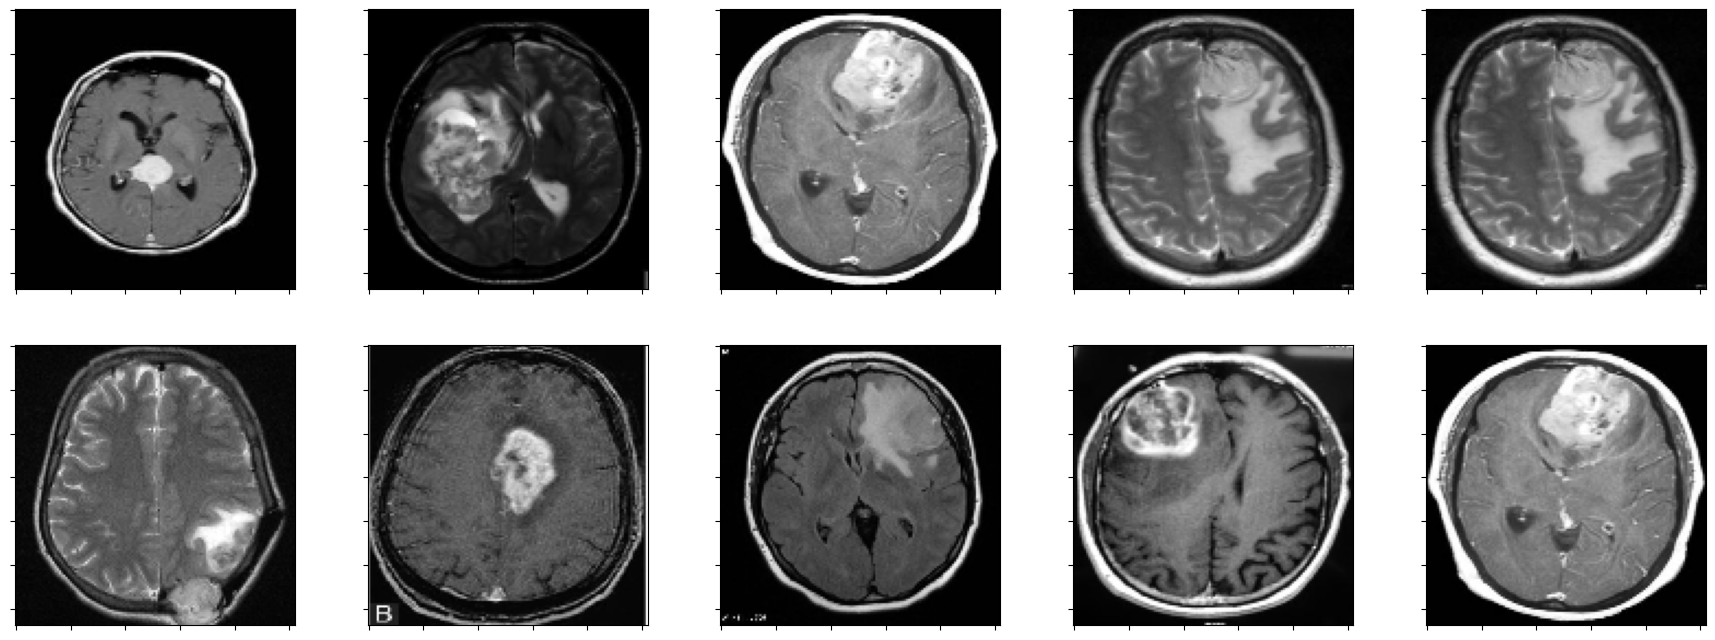

In [ ]:
plot_images(0,97)

In [ ]:
norm_data = (data - np.min(data)) / (np.max(data) - np.min(data))
print(norm_data)


[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]

 [[0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
  [0.00392157 0.003921

In [ ]:
SEED = 40

In [ ]:
tf.random.set_seed(SEED)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(128,128,1)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


In [ ]:
history = model.fit(norm_data, labels, epochs = 20, validation_split = 0.20)


Epoch 1/20
7/7 [==============================] - 24s 3s/step - loss: 0.6522 - accuracy: 0.6386 - val_loss: 1.3286 - val_accuracy: 0.0000e+00
Epoch 2/20
7/7 [==============================] - 21s 3s/step - loss: 0.5189 - accuracy: 0.7673 - val_loss: 1.0221 - val_accuracy: 0.0000e+00
Epoch 3/20
7/7 [==============================] - 24s 3s/step - loss: 0.4877 - accuracy: 0.7673 - val_loss: 1.4500 - val_accuracy: 0.0000e+00
Epoch 4/20
7/7 [==============================] - 21s 3s/step - loss: 0.4406 - accuracy: 0.7970 - val_loss: 0.9617 - val_accuracy: 0.4118
Epoch 5/20
7/7 [==============================] - 23s 3s/step - loss: 0.4077 - accuracy: 0.8416 - val_loss: 1.2149 - val_accuracy: 0.4118
Epoch 6/20
7/7 [==============================] - 20s 3s/step - loss: 0.3788 - accuracy: 0.8317 - val_loss: 0.8664 - val_accuracy: 0.6275
Epoch 7/20
7/7 [==============================] - 23s 3s/step - loss: 0.3568 - accuracy: 0.8416 - val_loss: 1.1514 - val_accuracy: 0.4510
Epoch 8/20
7/7 [======

In [ ]:
result = model.evaluate(norm_data, labels, verbose=0)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

Accuracy on Evaluation: 91.70%
Loss: 0.6009


In [ ]:
np.random.seed(SEED)
indxs = np.random.randint(0, 252, 20)

In [ ]:
y_pred_prob = model.predict(norm_data[indxs])
y_pred = np.array([1 if prob>0.5 else 0 for prob in y_pred_prob])

y_true = labels[indxs]
y_pred.shape, y_true.shape
     

1/1 [==============================] - 1s 534ms/step


((20,), (20,))

In [ ]:
y_pred


array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

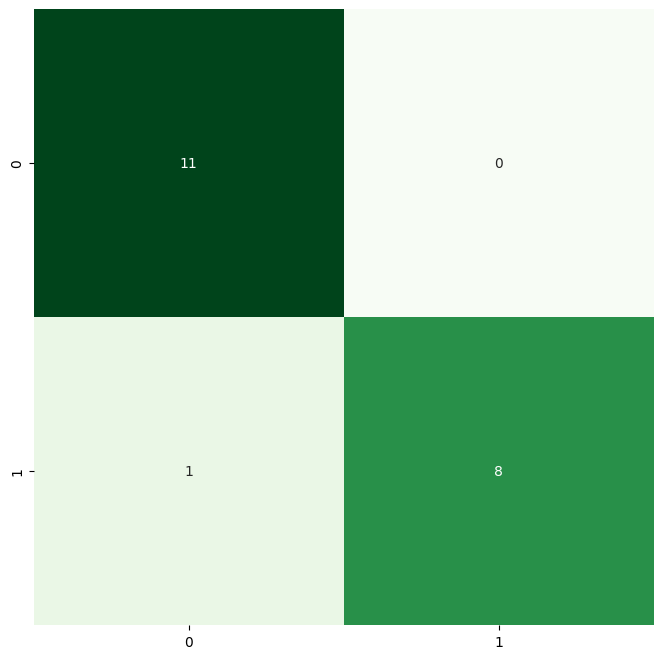

In [ ]:
plt.figure(figsize = (8,8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, cmap = "Greens", annot = True, fmt = ".2g", cbar = False)
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                    

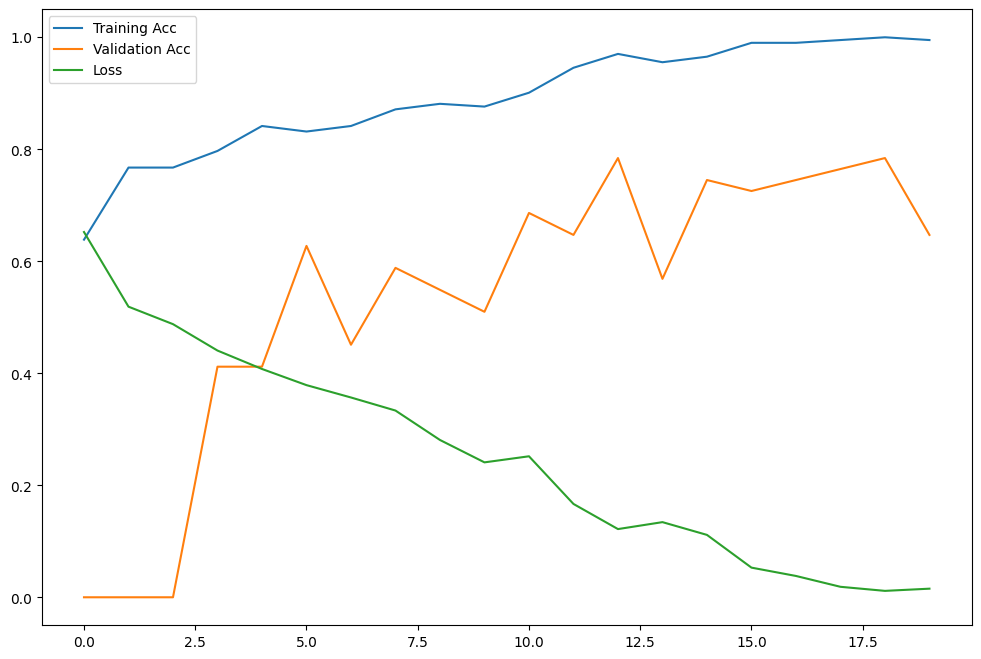

In [ ]:
histdf = pd.DataFrame(history.history)

plt.figure(figsize=(12,8))
plt.plot(histdf['accuracy'], label='Training Acc')
plt.plot(histdf['val_accuracy'], label='Validation Acc')
plt.plot(histdf['loss'], label='Loss')
plt.legend()
plt.show()

In [ ]:
#save model
from tensorflow.keras.models import load_model
model.save('brain_tumor.h5')

NameError: name 'model' is not defined